# ICS 485 Project

This is our work for ICS 485 (Machine Learning) course

The project demostrates supervised Machine Learning techniques on popular datasets.

We used the following algorithms:
   - Naive Bayes (from scratch)
   - K Nearest Neighbors (from scratch)
   - Support Vector Machines with kernels (SKlearn)
   - Boosting ensembles (Adaboost) (SKlearn)
   - Linear Discriminant Analysis (SKlearn)

The algortihms above are used on the following datasets:
   - Iris flowers dataset
   - Wine dataset
   - Diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import time

np.random.seed(15)

## Naive Bayes Implementation

In [2]:
from scipy.stats import norm
def NaiveBayes(X_train,y_train,X_test):
    '''
    our implementation of naive bayes.
    works for both multi class and binary classification.
    input:
        X_train: training data.
        Y_train: training labels.
        X_test: testing data.
    
    output:
        y_pred: predicted testing labels.
    '''
    #compute the means and standard deviatons
    means = X_train.groupby(y_train).apply(np.mean)
    stds = X_train.groupby(y_train).apply(np.std)
    #compute the probabilities of the training set
    probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
    y_pred = []
    for elm in range(X_test.shape[0]):
        p = {}
    
        for cl in np.unique(y_train):
            p[cl] = probs.iloc[cl]
        
            for index, param in enumerate(X_test.iloc[elm]):
                #compute the probabilities of each row in the testing set
                p[cl] *= norm.pdf(param,means.iloc[cl,index],stds.iloc[cl,index])
        y_pred.append(pd.Series(p).values.argmax())
    return y_pred

## K Nearest Neighbors Implementation

In [3]:
from math import sqrt

def KNN(train,test,num_neighbors):
    '''
    our implementation of kNN.
    input:
        train: training data.
        test: testing data.
        
        both of the training and testing data
        have the labels included with them
        so, no need for X_train, y_train..etc
    output:
        y_pred: predicted testing labels.
    '''
    y_pred = []
    for i in range(len(test)):
        neighbors = get_neighbors(train, test[i], 3)
        output_values = [row[-1] for row in neighbors]
        y_pred.append(max(set(output_values), key=output_values.count))
    return y_pred

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

## Iris Dataset

In [4]:
# read the data set, split into x (features) and y (labels)
dataset = pd.read_csv('iris.csv',names=['sepal length (cm)','sepal width (cm)',
                                         'petal length (cm)','petal width (cm)','flower type'],)
x = dataset.drop(columns='flower type')
y = dataset.drop(columns=['sepal length (cm)','sepal width (cm)',
                                         'petal length (cm)','petal width (cm)'])
#standardize the features
x = (x - np.mean(x))/np.std(x)
#encode the categorical targets
targets = {"flower type": {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}}
y = y.replace(targets)
y = np.array(y)
#remove the extra dimesion
y = np.squeeze(y)

from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.20)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 120 samples.
Testing set has 30 samples.


In [5]:
# create arraays to store various metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,fbeta_score

x_axis = ['NB','KNN','SVM','Adaboost','LDA']
iris_acc = []
iris_pre = []
iris_rec = []
iris_fbeta = []

### NB on Iris

In [6]:
from sklearn.metrics import classification_report
NB_iris_pred = NaiveBayes(X_train,y_train,X_test)
# store metrics
iris_acc.append(accuracy_score(y_test,NB_iris_pred))
iris_pre.append(precision_score(y_test,NB_iris_pred,average='weighted'))
iris_rec.append(recall_score(y_test,NB_iris_pred,average='weighted'))
iris_fbeta.append(fbeta_score(y_test,NB_iris_pred,beta = 0.3,average='weighted'))
NB_report = classification_report(y_test,NB_iris_pred)
print(NB_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### KNN on Iris
Note: we had to adjust the data set to include the data and the targets concatenated after modifying the instances

In [7]:
# read the data set, split into x (features) and y (labels)
dataset = pd.read_csv('iris.csv',names=['sepal length (cm)','sepal width (cm)',
                                         'petal length (cm)','petal width (cm)','flower type'],)
x = dataset.drop(columns='flower type')
y = dataset.drop(columns=['sepal length (cm)','sepal width (cm)',
                                         'petal length (cm)','petal width (cm)'])
#standardize the features
x = (x - np.mean(x))/np.std(x)
#encode the categorical targets
targets = {"flower type": {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}}
y = y.replace(targets)
#create a train and test set that are concatenated
new_df = pd.concat([x,y],axis=1)
mask = np.random.rand(len(new_df)) < 0.8
train = new_df[mask]
test = new_df[~mask]

KNN_iris_pred = KNN(np.array(train),np.array(test),num_neighbors=3)
KNN_y_test = test.drop(columns=['sepal length (cm)','sepal width (cm)',
                                         'petal length (cm)','petal width (cm)'])

iris_acc.append(accuracy_score(KNN_y_test,KNN_iris_pred))
iris_pre.append(precision_score(KNN_y_test,KNN_iris_pred,average='weighted'))
iris_rec.append(recall_score(KNN_y_test,KNN_iris_pred,average='weighted'))
iris_fbeta.append(fbeta_score(KNN_y_test,KNN_iris_pred,beta = 0.3,average='weighted'))

KNN_report = classification_report(KNN_y_test,KNN_iris_pred)
print(KNN_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.83      0.87        12
           2       0.85      0.92      0.88        12

    accuracy                           0.91        32
   macro avg       0.92      0.92      0.92        32
weighted avg       0.91      0.91      0.91        32



### SVM on Iris

In [8]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf',shrinking=True)
SVM.fit(X_train,y_train)
SVM_iris_pred = SVM.predict(X_test)
iris_acc.append(accuracy_score(y_test,SVM_iris_pred))
iris_pre.append(precision_score(y_test,SVM_iris_pred,average='weighted'))
iris_rec.append(recall_score(y_test,SVM_iris_pred,average='weighted'))
iris_fbeta.append(fbeta_score(y_test,SVM_iris_pred,beta = 0.3,average='weighted'))
SVM_report = classification_report(y_test,SVM_iris_pred)
print(SVM_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### AdaBoost on Iris

In [9]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost = AdaBoostClassifier(n_estimators=250)
Adaboost.fit(X_train,y_train)
Adaboost_iris_pred = Adaboost.predict(X_test)
iris_acc.append(accuracy_score(y_test,Adaboost_iris_pred))
iris_pre.append(precision_score(y_test,Adaboost_iris_pred,average='weighted'))
iris_rec.append(recall_score(y_test,Adaboost_iris_pred,average='weighted'))
iris_fbeta.append(fbeta_score(y_test,Adaboost_iris_pred,beta = 0.3,average='weighted'))
Adaboost_report = classification_report(y_test,Adaboost_iris_pred)
print(Adaboost_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.93      1.00      0.96        13
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Linear Discriminant Analysis on Iris

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd',store_covariance = True)
lda.fit(X_train,y_train)
lda_iris_pred = lda.predict(X_test)
iris_acc.append(accuracy_score(y_test,lda_iris_pred))
iris_pre.append(precision_score(y_test,lda_iris_pred,average='weighted'))
iris_rec.append(recall_score(y_test,lda_iris_pred,average='weighted'))
iris_fbeta.append(fbeta_score(y_test,lda_iris_pred,beta = 0.3,average='weighted'))
lda_report = classification_report(y_test,lda_iris_pred)
print(lda_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Results Comparison on the iris dataset

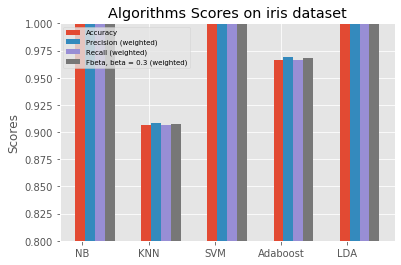

[1.0, 0.9082167832167831, 1.0, 0.9690476190476189, 1.0]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

ind = np.arange(5) 
width = 0.15       
plt.bar(ind, iris_acc, width, label='Accuracy')

plt.bar(ind + width, iris_pre, width,
    label='Precision (weighted)')

plt.bar(ind + width*2, iris_rec, width,
    label='Recall (weighted)')

plt.bar(ind + width*3, iris_fbeta, width,
    label='Fbeta, beta = 0.3 (weighted)')

plt.ylabel('Scores')
plt.title('Algorithms Scores on iris dataset')
plt.ylim(0.8, 1)
plt.xticks(ind + width / 4, x_axis)
plt.legend(loc='best',prop={'size': 7})
plt.show()
iris_pre

## Wine Dataset

In [12]:
wine_df = pd.read_csv('wine.csv',header = None)

data_cols = np.arange(1,14)
x = wine_df.drop(wine_df.columns[0],axis=1)
y = wine_df.drop(wine_df.columns[data_cols],axis=1)

#standardize the features
x = (x - np.mean(x))/np.std(x)
#encode the categorical targets
y = np.array(y)
#remove the extra dimesion
y = np.squeeze(y)
y = y-1

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.20)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 142 samples.
Testing set has 36 samples.


In [13]:
wine_acc = []
wine_pre = []
wine_rec = []
wine_fbeta = []

### NB on Wine

In [14]:
NB_wine_pred = NaiveBayes(X_train,y_train,X_test)
wine_acc.append(accuracy_score(y_test,NB_wine_pred))
wine_pre.append(precision_score(y_test,NB_wine_pred,average='weighted'))
wine_rec.append(recall_score(y_test,NB_wine_pred,average='weighted'))
wine_fbeta.append(fbeta_score(y_test,NB_wine_pred,beta = 0.3,average='weighted'))
NB_report = classification_report(y_test,NB_wine_pred)
print(NB_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### KNN on Wine

In [15]:
wine_df = pd.read_csv('wine.csv',header = None)

data_cols = np.arange(1,14)
x = wine_df.drop(wine_df.columns[0],axis=1)
y = wine_df.drop(wine_df.columns[data_cols],axis=1)

#standardize the features
x = (x - np.mean(x))/np.std(x)
y = y - 1
#create a train and test set that are concatenated
new_df = pd.concat([x,y],axis=1)
mask = np.random.rand(len(new_df)) < 0.8
train = new_df[mask]
test = new_df[~mask]

KNN_wine_pred = KNN(np.array(train),np.array(test),num_neighbors=3)
KNN_y_test = test.drop(wine_df.columns[data_cols],axis=1)

wine_acc.append(accuracy_score(KNN_y_test,KNN_wine_pred))
wine_pre.append(precision_score(KNN_y_test,KNN_wine_pred,average='weighted'))
wine_rec.append(recall_score(KNN_y_test,KNN_wine_pred,average='weighted'))
wine_fbeta.append(fbeta_score(KNN_y_test,KNN_wine_pred,beta = 0.3,average='weighted'))

KNN_report = classification_report(KNN_y_test,KNN_wine_pred)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5

    accuracy                           0.89        18
   macro avg       0.91      0.87      0.87        18
weighted avg       0.90      0.89      0.88        18



### SVM on Wine

In [16]:
SVM = SVC(kernel = 'rbf',shrinking=True)
SVM.fit(X_train,y_train)
SVM_wine_pred = SVM.predict(X_test)
wine_acc.append(accuracy_score(y_test,SVM_wine_pred))
wine_pre.append(precision_score(y_test,SVM_wine_pred,average='weighted'))
wine_rec.append(recall_score(y_test,SVM_wine_pred,average='weighted'))
wine_fbeta.append(fbeta_score(y_test,SVM_wine_pred,beta = 0.3,average='weighted'))
SVM_report = classification_report(y_test,SVM_wine_pred)
print(SVM_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



### AdaBoost on Wine

In [17]:
Adaboost = AdaBoostClassifier(n_estimators=250)
Adaboost.fit(X_train,y_train)
Adaboost_wine_pred = Adaboost.predict(X_test)
wine_acc.append(accuracy_score(y_test,Adaboost_wine_pred))
wine_pre.append(precision_score(y_test,Adaboost_wine_pred,average='weighted'))
wine_rec.append(recall_score(y_test,Adaboost_wine_pred,average='weighted'))
wine_fbeta.append(fbeta_score(y_test,Adaboost_wine_pred,beta = 0.3,average='weighted'))
Adaboost_report = classification_report(y_test,Adaboost_wine_pred)
print(Adaboost_report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.69      0.90      0.78        10
           2       1.00      0.71      0.83        14

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.89      0.86      0.86        36



### Linear Discriminant Analysis on Wine

In [18]:
lda = LinearDiscriminantAnalysis(solver='svd',store_covariance = True)
lda.fit(X_train,y_train)
lda_wine_pred = lda.predict(X_test)
wine_acc.append(accuracy_score(y_test,lda_wine_pred))
wine_pre.append(precision_score(y_test,lda_wine_pred,average='weighted'))
wine_rec.append(recall_score(y_test,lda_wine_pred,average='weighted'))
wine_fbeta.append(fbeta_score(y_test,lda_wine_pred,beta = 0.3,average='weighted'))
lda_report = classification_report(y_test,lda_wine_pred)
print(lda_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



### Results Comparison on the wine dataset


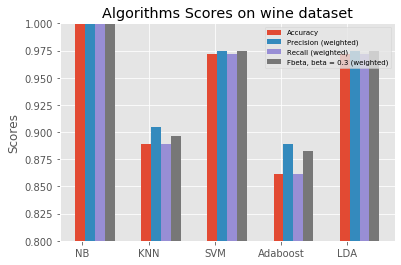

In [19]:
plt.bar(ind, wine_acc, width, label='Accuracy')

plt.bar(ind + width, wine_pre, width,
    label='Precision (weighted)')

plt.bar(ind + width*2, wine_rec, width,
    label='Recall (weighted)')

plt.bar(ind + width*3, wine_fbeta, width,
    label='Fbeta, beta = 0.3 (weighted)')

plt.ylabel('Scores')
plt.title('Algorithms Scores on wine dataset')
plt.ylim(0.8, 1)
plt.xticks(ind + width / 4, x_axis)
plt.legend(loc='best',prop={'size': 7})
plt.show()

## Diabetes Dataset

In [20]:
diabetes_df = pd.read_csv('diabetes_data.csv',header=None)

data_cols = np.arange(0,8)
x = diabetes_df.drop(diabetes_df.columns[8],axis=1)
y = diabetes_df.drop(diabetes_df.columns[data_cols],axis=1)

#standardize the features
x = (x - np.mean(x))/np.std(x)
#encode the categorical targets
y = np.array(y)
#remove the extra dimesion
y = np.squeeze(y)

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.20)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


In [21]:
diabetes_acc = []
diabetes_pre = []
diabetes_rec = []
diabetes_fbeta = []

### NB on diabetes

In [22]:
NB_diabetes_pred = NaiveBayes(X_train,y_train,X_test)
diabetes_acc.append(accuracy_score(y_test,NB_diabetes_pred))
diabetes_pre.append(precision_score(y_test,NB_diabetes_pred,average='weighted'))
diabetes_rec.append(recall_score(y_test,NB_diabetes_pred,average='weighted'))
diabetes_fbeta.append(fbeta_score(y_test,NB_diabetes_pred,beta = 0.3,average='weighted'))
NB_report = classification_report(y_test,NB_diabetes_pred)
print(NB_report)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       106
           1       0.62      0.73      0.67        48

    accuracy                           0.78       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.78      0.78       154



### KNN on diabetes

In [23]:
diabetes_df = pd.read_csv('diabetes_data.csv',header = None)

data_cols = np.arange(0,8)
x = diabetes_df.drop(diabetes_df.columns[8],axis=1)
y = diabetes_df.drop(diabetes_df.columns[data_cols],axis=1)

#standardize the features
x = (x - np.mean(x))/np.std(x)
#create a train and test set that are concatenated
new_df = pd.concat([x,y],axis=1)
mask = np.random.rand(len(new_df)) < 0.8
train = new_df[mask]
test = new_df[~mask]

KNN_diabetes_pred = KNN(np.array(train),np.array(test),num_neighbors=3)
KNN_y_test = test.drop(diabetes_df.columns[data_cols],axis=1)
diabetes_acc.append(accuracy_score(KNN_y_test,KNN_diabetes_pred))
diabetes_pre.append(precision_score(KNN_y_test,KNN_diabetes_pred,average='weighted'))
diabetes_rec.append(recall_score(KNN_y_test,KNN_diabetes_pred,average='weighted'))
diabetes_fbeta.append(fbeta_score(KNN_y_test,KNN_diabetes_pred,beta = 0.3,
                                  average='weighted'))
KNN_report = classification_report(KNN_y_test,KNN_diabetes_pred)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       113
           1       0.57      0.57      0.57        51

    accuracy                           0.73       164
   macro avg       0.69      0.69      0.69       164
weighted avg       0.73      0.73      0.73       164



### SVM on Wine

In [24]:
SVM = SVC(kernel = 'rbf',shrinking=True)
SVM.fit(X_train,y_train)
SVM_diabetes_pred = SVM.predict(X_test)
diabetes_acc.append(accuracy_score(y_test,SVM_diabetes_pred))
diabetes_pre.append(precision_score(y_test,SVM_diabetes_pred,average='weighted'))
diabetes_rec.append(recall_score(y_test,SVM_diabetes_pred,average='weighted'))
diabetes_fbeta.append(fbeta_score(y_test,SVM_diabetes_pred,beta = 0.3,average='weighted'))
SVM_report = classification_report(y_test,SVM_diabetes_pred)
print(SVM_report)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       106
           1       0.73      0.83      0.78        48

    accuracy                           0.85       154
   macro avg       0.82      0.85      0.83       154
weighted avg       0.86      0.85      0.85       154



### AdaBoost on diabetes

In [25]:
Adaboost = AdaBoostClassifier(n_estimators=250)
Adaboost.fit(X_train,y_train)
Adaboost_diabetes_pred = Adaboost.predict(X_test)
diabetes_acc.append(accuracy_score(y_test,Adaboost_diabetes_pred))
diabetes_pre.append(precision_score(y_test,Adaboost_diabetes_pred,average='weighted'))
diabetes_rec.append(recall_score(y_test,Adaboost_diabetes_pred,average='weighted'))
diabetes_fbeta.append(fbeta_score(y_test,Adaboost_diabetes_pred,beta = 0.3,average='weighted'))
Adaboost_report = classification_report(y_test,Adaboost_diabetes_pred)
print(Adaboost_report)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83       106
           1       0.61      0.81      0.70        48

    accuracy                           0.78       154
   macro avg       0.75      0.79      0.76       154
weighted avg       0.81      0.78      0.79       154



### Linear Discriminant Analysis on diabetes

In [26]:
lda = LinearDiscriminantAnalysis(solver='svd',store_covariance = True)
lda.fit(X_train,y_train)
lda_diabetes_pred = lda.predict(X_test)
diabetes_acc.append(accuracy_score(y_test,lda_diabetes_pred))
diabetes_pre.append(precision_score(y_test,lda_diabetes_pred,average='weighted'))
diabetes_rec.append(recall_score(y_test,lda_diabetes_pred,average='weighted'))
diabetes_fbeta.append(fbeta_score(y_test,lda_diabetes_pred,beta = 0.3,average='weighted'))
lda_report = classification_report(y_test,lda_diabetes_pred)
print(lda_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       106
           1       0.70      0.77      0.73        48

    accuracy                           0.82       154
   macro avg       0.79      0.81      0.80       154
weighted avg       0.83      0.82      0.83       154



### Results Comparison on the diabetes dataset

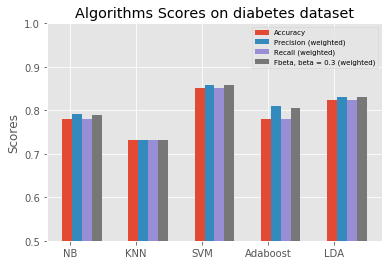

In [27]:
plt.bar(ind, diabetes_acc, width, label='Accuracy')

plt.bar(ind + width, diabetes_pre, width,
    label='Precision (weighted)')

plt.bar(ind + width*2, diabetes_rec, width,
    label='Recall (weighted)')

plt.bar(ind + width*3, diabetes_fbeta, width,
    label='Fbeta, beta = 0.3 (weighted)')

plt.ylabel('Scores')
plt.title('Algorithms Scores on diabetes dataset')
plt.ylim(0.5, 1)
plt.xticks(ind + width / 4, x_axis)
plt.legend(loc='best',prop={'size': 7})
plt.show()